In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from googletrans import Translator

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
!pip install googletrans==4.0.0-rc1

In [4]:
#NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
#data gathering

df =pd.read_csv("/content/drive/MyDrive/reviews_dataset.csv",encoding ="ISO-8859-1")
df.head()

,review_body,stars
0,"Normal, ni bien ni mal.",3
1,"Muy mala calidad, no lo recomiendo.",1
2,No funciona correctamente.,1
3,Estoy muy satisfecho con la compra.,5
4,Nada fuera de lo normal.,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  1000 non-null   object
 1   stars        1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
import nltk
nltk.download("wordnet", download_dir ="/content/drive/MyDrive/nltk_data/")
nltk.download("punkt_tab")
nltk.download("punkt")

[nltk_data] Downloading package wordnet to
[nltk_data]     /content/drive/MyDrive/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words =set(stopwords.words("spanish"))

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'<.*?>','',text)
  text = re.sub(r'https\S+|www\S+','',text)
  text = re.sub(r'[^a-záéíóúñü\s]','',text)
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  tokens = [lemmatizer.lemmatize(word)for word in tokens]
  return ' '.join(tokens)

df['cleaned_review'] = df['review_body'].apply(preprocess_text)
df['cleaned_review']

,cleaned_review
0,normal bien mal
1,mala calidad recomiendo
2,funciona correctamente
3,satisfecho compra
4,normal
...,...
995,cumple básico
996,bien precio
997,excelente calidad buen precio
998,normal


In [9]:
translator = Translator()

def translate_text(text):
    try:
        translation = translator.translate(text, src='es', dest='en')
        return translation.text
    except:
        return text

df['review_en'] = df['review_body'].apply(translate_text)


In [10]:
df['review_en']

,review_en
0,"Normal, as soon or bad."
1,"Very poor quality, I do not recommend it."
2,It does not work correctly.
3,I am very satisfied with the purchase.
4,Nothing out of the ordinary.
...,...
995,Cumple con lo básico.
996,Está bien por el precio.
997,Excelente calidad y muy buen precio.
998,Nada fuera de lo normal.


In [11]:
df["stars"].unique()

array([3, 1, 5])

In [12]:

df["stars"].value_counts()

,count
stars,
3,351
5,334
1,315


/tmp/ipython-input-13-205968475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stars', palette='magma')


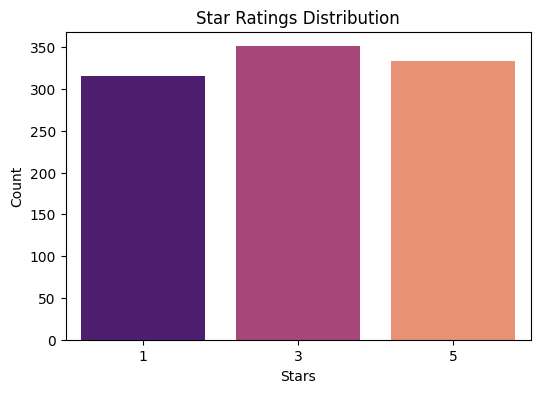

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='stars', palette='magma')
plt.title('Star Ratings Distribution')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


In [14]:
def map_sentiment(stars):
    if stars <= 2:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['stars'].apply(map_sentiment)


/tmp/ipython-input-15-2805682500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


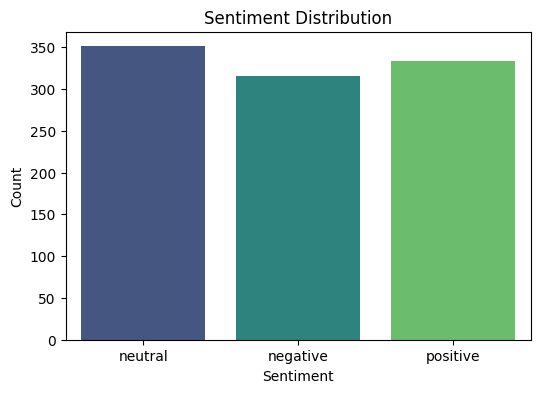

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [16]:
# splited data into x : independant features, y : target column
x = df['cleaned_review']
y = df['stars']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(max_features=5000)
xtrain_vec = vectorizer.fit_transform(xtrain)
xtest_vec = vectorizer.transform(xtest)


In [19]:
xtrain_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1865 stored elements and shape (800, 27)>

In [20]:
xtest_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 485 stored elements and shape (200, 27)>

In [21]:
#model training
model = LogisticRegression(max_iter=1000)
model.fit(xtrain_vec, ytrain)


LogisticRegression(max_iter=1000)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# model evaluation on training data

ytrain_pred = model.predict(xtrain_vec)

print("Accuracy:", accuracy_score(ytrain,ytrain_pred))
print("\nClassification Report:\n", classification_report(ytrain, ytrain_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       252
           3       1.00      1.00      1.00       281
           5       1.00      1.00      1.00       267

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [24]:
# model evaluation on testing data

ytest_pred = model.predict(xtest_vec)

print("Accuracy:", accuracy_score(ytest,ytest_pred))
print("\nClassification Report:\n", classification_report(ytest, ytest_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        67

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [25]:
df[['review_en', "stars"]].head()


,review_en,stars
0,"Normal, as soon or bad.",3
1,"Very poor quality, I do not recommend it.",1
2,It does not work correctly.,1
3,I am very satisfied with the purchase.,5
4,Nothing out of the ordinary.,3


In [26]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=0).fit(xtrain_vec)
kmeans_model

KMeans(n_clusters=3, random_state=0)

In [27]:
ytrain_pred = kmeans_model.predict(xtrain_vec)
ytrain_pred

array([2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,

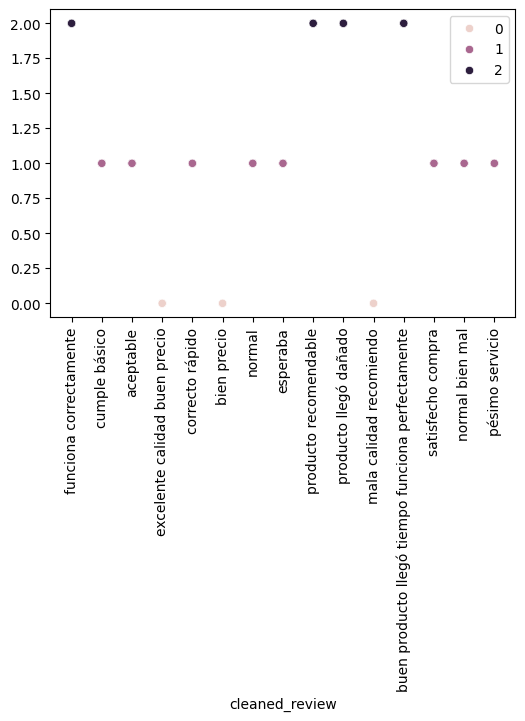

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=xtrain, y=ytrain_pred, hue = ytrain_pred)
plt.xticks(rotation=90)
plt.show()

In [29]:
xtrain.head(1)

,cleaned_review
30,funciona correctamente


In [30]:
ytrain

,stars
30,1
223,3
91,3
335,5
183,5
...,...
289,1
956,5
419,3
859,1


In [31]:
if model.predict(xtrain_vec[0]) <= 2 :
  print("Negative Review")
elif model.predict(xtrain_vec[0]) == 3 :
  print("Neutral Review")
else :
  print("Positive Review")

Negative Review


In [32]:
## save best model to pickle file

import pickle

pickle.dump(model, open('model.pkl', 'wb'))

In [33]:
def predict_sentiment(review_vec):
  final_model = pickle.load(open('model.pkl', 'rb'))

  prediction = final_model.predict(review_vec)

  if prediction <= 2 :
    print("Negative Review")
  elif prediction == 3 :
    print("Neutral Review")
  else :
    print("Positive Review")


In [34]:
input_data = xtrain_vec[5]
input_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (1, 27)>

In [35]:
model.predict(input_data)

array([5])

In [36]:
predict_sentiment(input_data)

Positive Review
